<h3>
    <center> Database Connectivity using Python-Core! </center>
</h3>

###### Softwares to Install
1. mySQL and mySQL Workbench from MySQL Website
2. pip3 install mysql-connector or pip install mysql-connector

###### Import mysql.connector and connect to DB with Credentials
- MySQLDBHostName - IP Address or Hostname for your MySQL database.
- MySQLDBUserName - The userName used to authenticate with your MySQL database.
- MySQLDBPassword - The password used to authenticate with your MySQL database.
- MySQLDBDBName - The DB to connect to from your MySQL database.

In [76]:
import mysql.connector as conn

MySQLDBHostName = ''
MySQLDBUserName = ''
MySQLDBPassword = ''
MySQLDBDBName = ''

myDB = conn.connect(
    host=MySQLDBHostName, 
    user=MySQLDBUserName,
    passwd=MySQLDBPassword,
    database=MySQLDBDBName
)

print(myDB)

###### Show tables in the 'MySQLDBDBName' Database

In [77]:
myCursor = myDB.cursor()

myCursor.execute('show tables')
for i in myCursor:
    print(i, end=' , ')

('tvheroes',) , 

###### Select existing records from tvheroes table

In [69]:
myCursor = myDB.cursor()

myCursor.execute('select * from tvheroes')
for i in myCursor:
    print(i)

(1, 'Cal Lightman', 'Lie to me')
(2, 'Emily Thorne', 'Revenge')
(4, 'Olliver Queen', 'Arrow')
(5, 'Damon Salvatore', 'Vampire Diaries')


###### Insert data into tvheroes table

In [70]:
#  %s are placeholders
sqlQuery = "INSERT INTO tvheroes(heroName,seriesName) VALUES(%s,%s)"
usr2 = ('Dr. Henry Morgan','Forever')
usr3 = ('Chandler Bing','Friends')

myCursor.execute(sqlQuery,usr2)
myCursor.execute(sqlQuery,usr3)

# Execute as many times as needed but dont forget to commit otherwise it wont be saved
myDB.commit()

###### Read data from DB - fetchone(1st row) or fetchall

In [71]:
myCursor.execute('select * from tvheroes')
resultSet = myCursor.fetchall()
for i in resultSet:
    print(i)

(1, 'Cal Lightman', 'Lie to me')
(2, 'Emily Thorne', 'Revenge')
(4, 'Olliver Queen', 'Arrow')
(5, 'Damon Salvatore', 'Vampire Diaries')
(18, 'Dr. Henry Morgan', 'Forever')
(19, 'Chandler Bing', 'Friends')


In [72]:
myCursor.execute('select * from tvheroes')
resultSet = myCursor.fetchone()
print(resultSet)

(1, 'Cal Lightman', 'Lie to me')


###### Insert multiple values into the DB - executemany

In [78]:
# %s is placeholders - No need for key as auto_increment
sqlQuery = "INSERT INTO tvheroes(heroName,seriesName) VALUES(%s,%s)"
userList = [ ('Walter White','Breaking Bad'),('Frank Underwood','House of Cards'), ('Olivia Pope','Scandal') ]

myCursor.executemany(sqlQuery,userList)

# Execute as many times as needed but dont forget to commit otherwise it wont be saved
myDB.commit()

myCursor.execute('select * from tvheroes')
resultSet = myCursor.fetchall()
resultSet

[(1, 'Cal Lightman', 'Lie to me'),
 (2, 'Emily Thorne', 'Revenge'),
 (4, 'Olliver Queen', 'Arrow'),
 (5, 'Damon Salvatore', 'Vampire Diaries'),
 (18, 'Dr. Henry Morgan', 'Forever'),
 (19, 'Chandler Bing', 'Friends'),
 (20, 'Walter White', 'Breaking Bad'),
 (21, 'Frank Underwood', 'House of Cards'),
 (22, 'Olivia Pope', 'Scandal')]

In [79]:
#  %s are placeholders
sqlQuery = "INSERT INTO tvheroes(heroName,seriesName) VALUES(%s,%s)"
user2 = ('Ms Chanandler Bong','Friends')

myCursor.execute(sqlQuery,user2)

# Execute as many times as needed but dont forget to commit otherwise it wont be saved
myDB.commit()

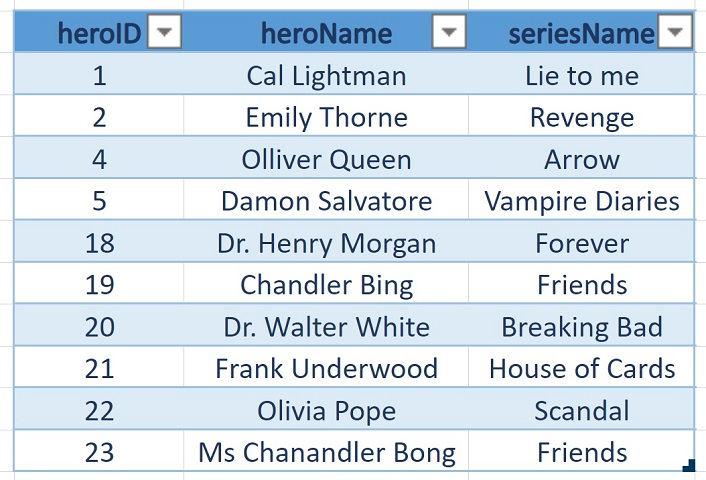

In [2]:
from IPython.display import Image, display
display(Image(filename='img/TVSeriesList.jpg', embed=True))

###### Select with where clause

In [80]:
myCursor.execute("select * from tvheroes where heroName like '%ng%'")
resultSet = myCursor.fetchall()
for i in resultSet:
    print(i)

(19, 'Chandler Bing', 'Friends')
(23, 'Ms Chanandler Bong', 'Friends')


###### Update data in our DB

In [81]:
sqlQuery = "UPDATE tvheroes SET heroName='Dr. Walter White' WHERE heroID = 20"

myCursor.execute(sqlQuery)

myDB.commit()

myCursor.execute('select * from tvheroes where heroID = 20')
resultSet = myCursor.fetchone()
print(resultSet)

(20, 'Dr. Walter White', 'Breaking Bad')


###### Limiting the no. of records - LIMIT 

In [82]:
myCursor.execute('select * from tvheroes LIMIT 5')
resultSet = myCursor.fetchall()
print(resultSet)

[(1, 'Cal Lightman', 'Lie to me'), (2, 'Emily Thorne', 'Revenge'), (4, 'Olliver Queen', 'Arrow'), (5, 'Damon Salvatore', 'Vampire Diaries'), (18, 'Dr. Henry Morgan', 'Forever')]


###### First 5 values in offsets - OFFSET

In [83]:
myCursor.execute('select * from tvheroes LIMIT 5 OFFSET 2')
resultSet = myCursor.fetchall()
print(resultSet)

[(4, 'Olliver Queen', 'Arrow'), (5, 'Damon Salvatore', 'Vampire Diaries'), (18, 'Dr. Henry Morgan', 'Forever'), (19, 'Chandler Bing', 'Friends'), (20, 'Dr. Walter White', 'Breaking Bad')]


###### Order our results - Order By

In [84]:
myCursor.execute('select * from tvheroes ORDER BY seriesName DESC')
resultSet = myCursor.fetchall()
print(resultSet)

[(5, 'Damon Salvatore', 'Vampire Diaries'), (22, 'Olivia Pope', 'Scandal'), (2, 'Emily Thorne', 'Revenge'), (1, 'Cal Lightman', 'Lie to me'), (21, 'Frank Underwood', 'House of Cards'), (19, 'Chandler Bing', 'Friends'), (23, 'Ms Chanandler Bong', 'Friends'), (18, 'Dr. Henry Morgan', 'Forever'), (20, 'Dr. Walter White', 'Breaking Bad'), (4, 'Olliver Queen', 'Arrow')]


###### Delete record 

In [50]:
sqlQuery = "DELETE FROM tvheroes WHERE heroID = 11"

myCursor.execute(sqlQuery)

myDB.commit()

myCursor.execute('select * from tvheroes')
resultSet = myCursor.fetchall()
print(resultSet)

[(1, 'Cal Lightman', 'Lie to me'), (2, 'Emily Thorne', 'Revenge'), (4, 'Olliver Queen', 'Arrow'), (5, 'Damon Salvatore', 'Vampire Diaries'), (6, 'Dr Henry Morgan', 'Forever'), (7, 'Chandler Bing', 'Friends'), (8, 'Dr Walter White', 'Breaking Bad'), (9, 'Frank Underwood', 'House of Cards'), (10, 'Olivia Pope', 'Scandal'), (12, 'Walter White', 'Breaking Bad'), (13, 'Frank Underwood', 'House of Cards'), (14, 'Olivia Pope', 'Scandal')]


###### Drop a table 

In [65]:
myCursor.execute('SHOW TABLES')
resultSet = myCursor.fetchall()
print('B4 : ', resultSet)

sqlQuery = "DROP TABLE IF EXISTS tab"

myCursor.execute(sqlQuery)

myDB.commit()

myCursor.execute('SHOW TABLES')
resultSet = myCursor.fetchall()
print('After : ', resultSet)

B4 :  [('tab',), ('tvheroes',)]
After :  [('tvheroes',)]
